Text(0.5,0,u'x')

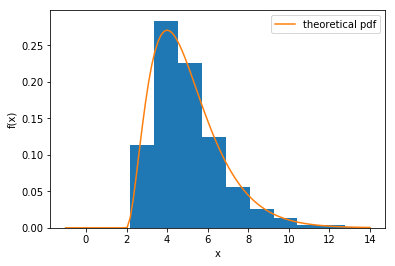

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Инициализирую gamma_r гамма-распределением (k=3;theta=2), геренирую выборку размером в 1000, рисую гистограмму выборки
k = 3.
theta = 2.
gamma_r = sts.gamma(k,theta)
sample = gamma_r.rvs(1000)
plt.hist(sample, normed=True)

# инициализирую x списком из 100 элементов от -1 до 10. Считаю плотность вероятности, рисую кк
init_x = np.linspace(-1,14,100)
pdf = gamma_r.pdf(init_x)
plt.plot(init_x, pdf, label='theoretical pdf')

# Наношу легенду на график
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')


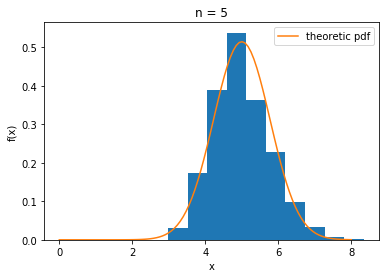

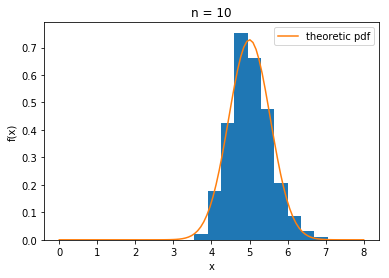

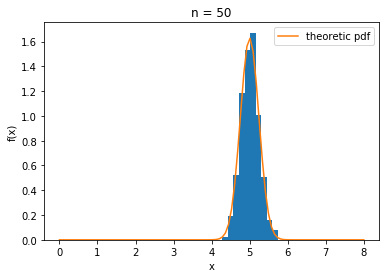

In [99]:
#кортеж из объема выборок
sample_number = (5,10,50)

#считаю мю для центральной теоремы
mu = gamma_r.mean()

#набор значених для координаты x для построения графиков
init_x = np.linspace(0,8,100)

#провожу расчеты и строю графики в цикле, для каждого объема выборки
for x in sample_number:
    
    sample = []
    meanX = []
    
    for i in range (1, 1000):
        sample.append(gamma_r.rvs(x)) #генерирую список случайных выборок объема sample_number

    for i in sample:
        meanX.append(np.mean(i)) #создаю список выборочных средних

    #расчитываю значения для построения нормального распределения приближающего значения выборочных средних для гамма-распределения
    sigma = (gamma_r.var()/x)**0.5 #считаю сигму для нормального распределению приближающего график ваборочнх средних
    norm_rv = sts.norm(mu, sigma) #инициализирую нормально распределенную случайную величину
    norm_pdf = norm_rv.pdf(init_x) #создаю массив значений плотности веротности для этой случайной величины
    
    #строю графики эмпирической плотности вероятности и теоретической кривой
    plt.figure() #создаю новый график
    plt.title('n = %s' %x) #указываю заголовок
    plt.hist(meanX, normed=True) #рисую гистограмму выборочных средних
    plt.plot(init_x, norm_pdf, label='theoretic pdf') #рисую кривую плотности веротности для нормального распределения
    
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(loc='upper right')
